## A Sequential Neural Network multi-class classifier on the 470-feature data set.

Uses 100 100 50 dense layers and leaky relu activation function.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy
from keras.layers import Dense, Dropout
from keras.metrics import SparseCategoricalAccuracy
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('CSV/feature_vectors_470.csv', index_col=False)

In [22]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
features = df.iloc[:,0:469]
labels = df['Class']

In [24]:
X=features
y=np.ravel(labels)

In [25]:
y

array([1, 1, 1, ..., 5, 5, 5])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train.shape

(9278, 469)

In [29]:
model = Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dropout(rate=.5, seed=42))
model.add(Dense(6, activation='softmax'))

In [30]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy",
optimizer=opt,
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=2000,verbose=0)

In [31]:
model.evaluate(X_test, y_test)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.9167 - loss: 1.2199


[1.8709560632705688, 0.9168103337287903]

In [32]:
y_test_pred = np.argmax(model.predict(X_test),axis=1)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step


In [33]:
y_test_pred

array([3, 3, 5, ..., 5, 5, 4])

In [34]:
confusion_matrix(y_test, y_test_pred)

array([[220,  11,   2,  15,  14],
       [ 16, 369,   9,  10,  20],
       [  0,   3, 781,   0,   2],
       [ 16,  10,   3, 452,  19],
       [ 12,   6,   6,  19, 305]])

In [35]:
multilabel_confusion_matrix(y_test,y_test_pred)

array([[[2014,   44],
        [  42,  220]],

       [[1866,   30],
        [  55,  369]],

       [[1514,   20],
        [   5,  781]],

       [[1776,   44],
        [  48,  452]],

       [[1917,   55],
        [  43,  305]]])

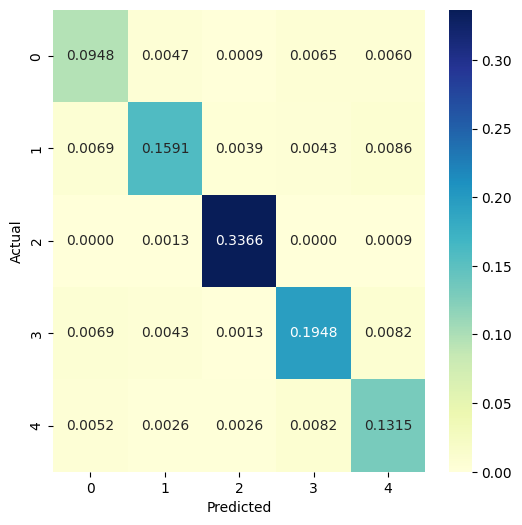

In [36]:
cm = confusion_matrix(y_test, y_test_pred, normalize='all')
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='.4f', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

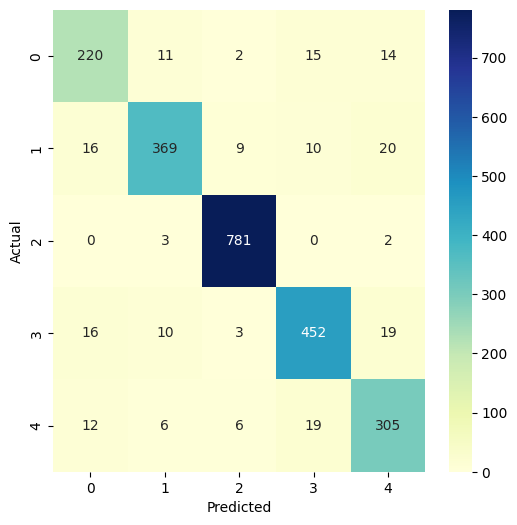

In [37]:
cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)